## Пример решения задачи регрессии с помощью KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [2]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [3]:
X[:5]

array([[ 0.00762708],
       [ 0.21670101],
       [ 0.25523875],
       [ 0.33675025],
       [ 0.43035242]])

In [4]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.007627  ,  0.21500896,  0.25247643,  0.33042162,  0.41719111,
        0.46221268,  0.48014603,  0.48985974,  0.56567161,  0.61040768,
        0.71869606,  0.8208491 ,  0.89063816,  0.89634408,  0.90555073,
        0.9495898 ,  0.92991457,  0.76835657,  0.6611327 ,  0.29823038,
        0.29629544,  0.07250508, -0.04981996, -0.05115584, -0.09764604,
       -0.34640726, -0.39193146, -0.40976577, -0.60115751, -0.67521064,
       -0.84724333, -0.88141586, -0.88483371, -0.94997225, -0.98917094,
       -0.99547547, -0.99163122, -0.99054502, -0.98362268, -0.97166787])

In [5]:
np.sin( X )[:5]

array([[ 0.007627  ],
       [ 0.21500896],
       [ 0.25247643],
       [ 0.33042162],
       [ 0.41719111]])

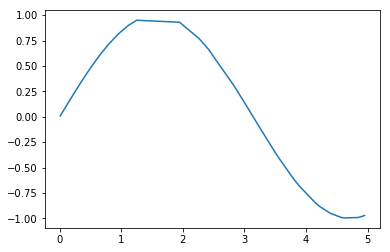

In [6]:
# проверим как это выглядит на графике
plt.plot( X, y )
plt.show()

In [7]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

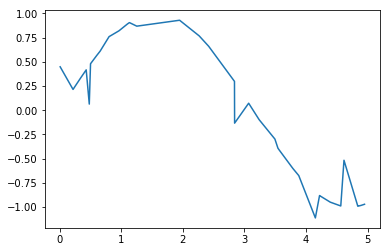

In [8]:
plt.plot( X, y )
plt.show()

In [9]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # сто точек в интервале от 0 до 1

In [10]:
T[:5]

array([[ 0.        ],
       [ 0.01002004],
       [ 0.02004008],
       [ 0.03006012],
       [ 0.04008016]])

In [11]:
n_neighbors = 5 # количество соседей для KNN

In [12]:
# обучаем модель, все точки имеют одинаковый вес (weights = 'uniform')
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

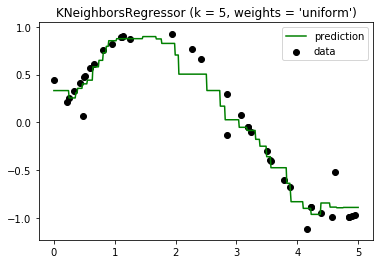

In [13]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

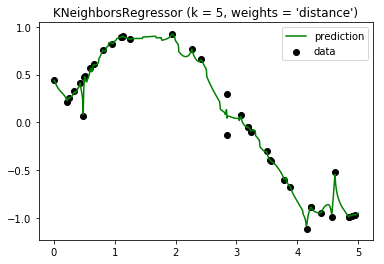

In [14]:
# точки имеют вес, обратно пропорциональный расстоянию до них (weights = 'distance')
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()